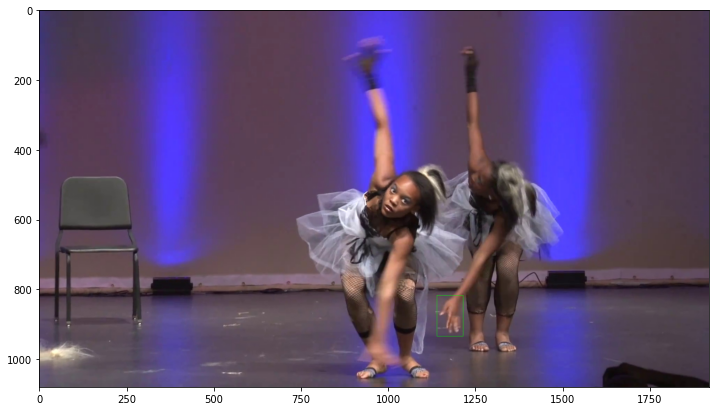

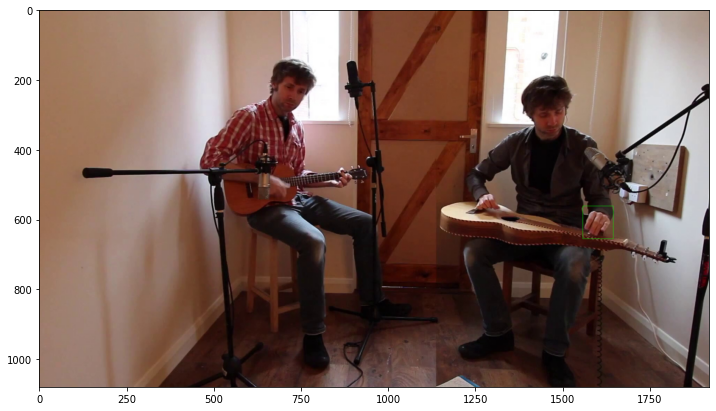

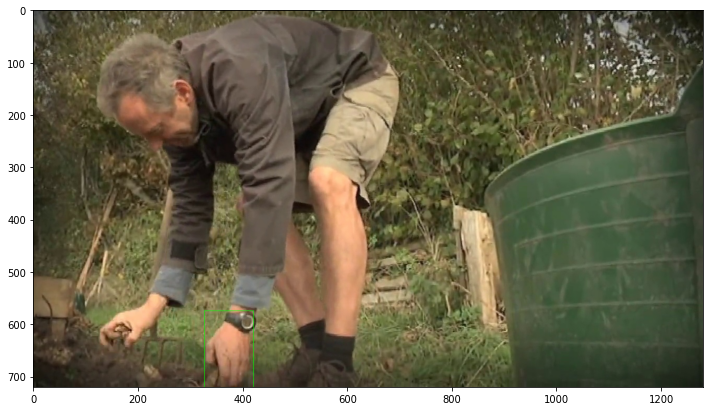

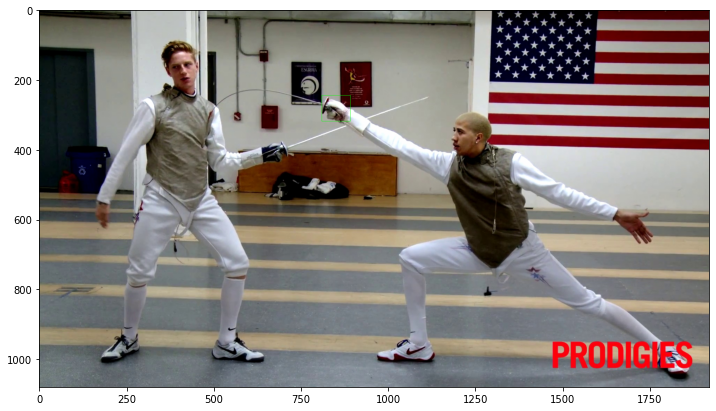

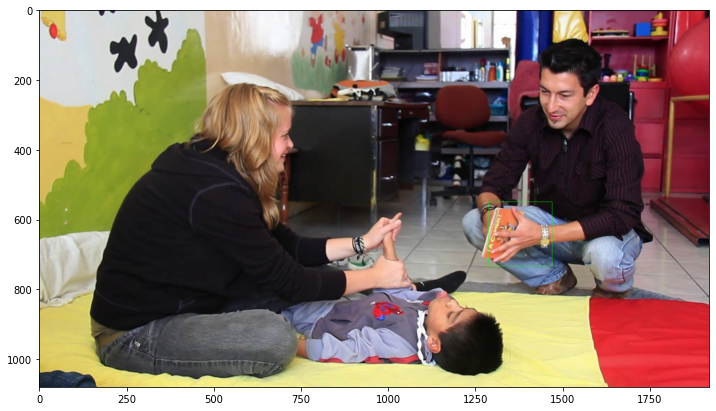

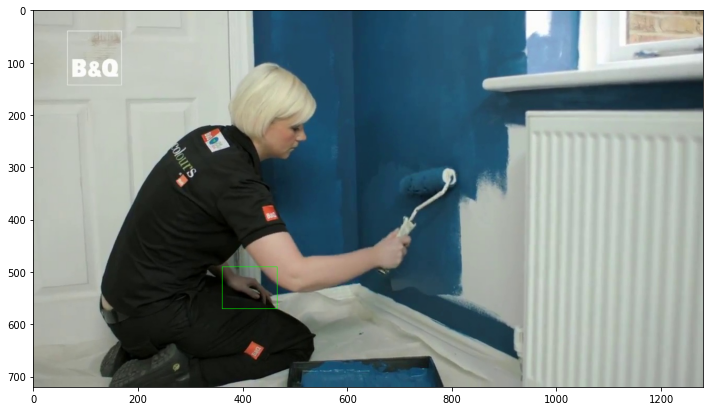

In [1]:
import json
import os 
import cv2
# %pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

path = './val/'
list_json = [file for file in os.listdir(path) if ".json" in file]

for i,file_json in enumerate(list_json):
    f = open(path+file_json)
    annotation = json.load(f)
    point = annotation['hand_pts']
#     print(file_json)
    
    # Get all point x and y 
    x_list = [tick[0] for tick in point]
    y_list = [tick[1] for tick in point]
    
    x_min = min(x_list)
    x_max = max(x_list)

    y_min = min(y_list)
    y_max = max(y_list)
    
#     center_x , center_y = annotation['hand_box_center']
    file_image = file_json.replace('.json','.jpg')
    img = mpimg.imread(path+file_image)
    
    cv2.rectangle(img, (int(x_min-10), int(y_min-16)), (int(x_max+10), int(y_max)+10), color=(0, 255, 0), thickness =1)
#     name_name = '/Users/deepmind/Desktop/hand_labels/output_check/'+str(i)+'.png'
#     cv2.imwrite(name_name,img)
    plt.figure(figsize=(12, 12))
    plt.imshow(img)
    
    if i == 5:
        break

In [2]:
dataset = {}
dataset['info'] = {} 
dataset['info']["contributor"] = "Vin-AI Lab"
dataset['info']["date_created"] = '4/5/2020' 
dataset['info']["description"] = "Hand-Dataset" 
dataset['info']["url"] = "https://github.com/oggyfaker"
dataset['info']["Version"] = "1.0"
dataset['info']["year"] = "2020"


license = {} 
license['id'] = 1 
license['name'] = "VinAi Lab"
license['url'] = "https://github.com/oggyfaker"
dataset["licenses"] = []
dataset["licenses"].append(license)
print(dataset)


# Create dictionary of name and height and weight
path = './val/'
list_image = [file.replace('.json','.jpg') for file in list_json]

import cv2
image_dict = {}
for image_item in list_image:
    h, w, c  = (cv2.imread(path+image_item)).shape
    image_dict[image_item] = [w,h]
    
dataset['image'] = []
for i,image_name in enumerate(image_dict):
    dict_tmp = {}
    dict_tmp['file_name'] = image_name
    dict_tmp['width'] ,dict_tmp['height'] = image_dict[image_name]
    dict_tmp["id"] = i 
    dict_tmp['license'] = 1
    dict_tmp["flickr_url"] = ""
    dict_tmp["coco_url"] = ""
    dict_tmp["date_captured"] = "15/5/2020"
    dataset['image'].append(dict_tmp)
    
# Category 
dict_temp_cat = {}
dict_temp_cat['id'] = 1 
dict_temp_cat['name'] = "hand"
dict_temp_cat["supercategory"] = "Body"

dataset['categories'] = []
dataset['categories'].append(dict_temp_cat)


{'info': {'contributor': 'Vin-AI Lab', 'date_created': '4/5/2020', 'description': 'Hand-Dataset', 'url': 'https://github.com/oggyfaker', 'Version': '1.0', 'year': '2020'}, 'licenses': [{'id': 1, 'name': 'VinAi Lab', 'url': 'https://github.com/oggyfaker'}]}


In [3]:
dataset['annotation'] = []
count_id = 0

for item_image in list_image:      
    file_json = item_image.replace(".jpg",".json")
    f = open(path+file_json)
    annotation = json.load(f)
    point = annotation['hand_pts']
        
    x_list = [tick[0] for tick in point]
    y_list = [tick[1] for tick in point]
    
    x_min = min(x_list)-11 
    x_max = max(x_list)+11

    y_min = min(y_list)-16
    y_max = max(y_list)+11
        
    width = x_max - x_min 
    height = y_max - y_min 
        
    dict_anotate_temp = {}
    dict_anotate_temp['id'] = count_id
    count_id += 1 
    # 1 == hand 
    dict_anotate_temp["category_id"] = 1    
    
    for image in dataset['image']:
        if image['file_name'] == item_image:
            id_image = image['id']
            break 
                
    dict_anotate_temp["image_id"] = id_image
    dict_anotate_temp["iscrowd"] = 0
    dict_anotate_temp["segmentation"] = [[]]
    dict_anotate_temp["area"] = width *  height
    dict_anotate_temp["bbox"] = [x_min,y_min,width,height]
    
    dataset['annotation'].append(dict_anotate_temp)
for item in dataset['annotation']:
    print(item)

        
with open("Result Json/CMU_val2020.json", "w") as outfile: 
    json.dump(dataset, outfile)

{'id': 0, 'category_id': 1, 'image_id': 0, 'iscrowd': 0, 'segmentation': [[]], 'area': 9216.521345078936, 'bbox': [1139.02783203125, 817.0, 77.4774169921875, 118.95751953124989]}
{'id': 1, 'category_id': 1, 'image_id': 1, 'iscrowd': 0, 'segmentation': [[]], 'area': 8410.310313642023, 'bbox': [1557.9396972656252, 561.4650878906249, 88.26074218749977, 95.28936767578148]}
{'id': 2, 'category_id': 1, 'image_id': 2, 'iscrowd': 0, 'segmentation': [[]], 'area': 15951.779637085265, 'bbox': [326.99499511718744, 574.0, 96.00021362304682, 166.16400146484375]}
{'id': 3, 'category_id': 1, 'image_id': 3, 'iscrowd': 0, 'segmentation': [[]], 'area': 6306.971041858201, 'bbox': [809.09619140625, 244.22610473632807, 83.90380859375, 75.16906738281256]}
{'id': 4, 'category_id': 1, 'image_id': 4, 'iscrowd': 0, 'segmentation': [[]], 'area': 34143.07624983792, 'bbox': [1287.0671386718748, 549.12744140625, 183.93286132812523, 185.6279296875]}
{'id': 5, 'category_id': 1, 'image_id': 5, 'iscrowd': 0, 'segmentati